In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("weight-height.csv")
data["Weight"] *= 0.453592 # pounds to kg
data["Height"] *= 2.54 # inches to cm
data = data[["Height","Weight"]]

In [3]:
print( data[0:10])
print(data.shape)

       Height      Weight
0  187.571423  109.720985
1  174.706036   73.622732
2  188.239668   96.497550
3  182.196685   99.809504
4  177.499761   93.598619
5  170.822660   69.042216
6  174.714106   83.428219
7  173.605229   76.190352
8  170.228132   79.800187
9  161.179495   70.941642
(10000, 2)


## MC Simulation

model: $H(eight) = 2 \cdot W(eight)$

$H \propto N(170,10) $

In [38]:
MC = {}
N_MC = 5000
MC["Height"] = np.random.normal(180,3,N_MC)
MC["Height"] = np.random.normal(168,9.77,N_MC)
MC["Weight"] = 0.5 * MC["Height"]


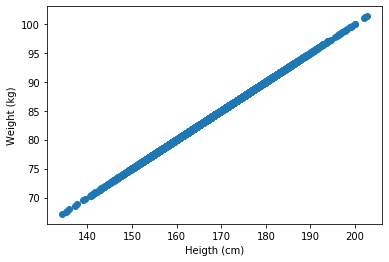

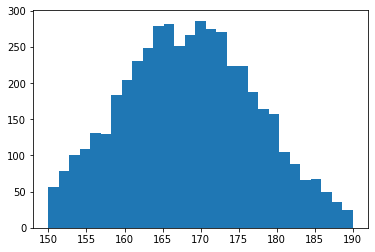

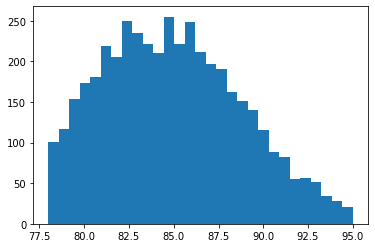

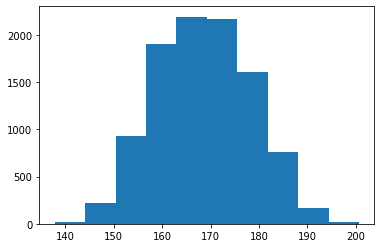

9683


In [39]:
plt.scatter(MC["Height"],MC["Weight"])
plt.xlabel("Heigth (cm)")
plt.ylabel("Weight (kg)")
plt.show()
Nbins = 30
MC_H_hist = plt.hist(MC["Height"],np.linspace(150,190,Nbins))
H_binning = MC_H_hist[1]
plt.show()
MC_W_hist = plt.hist(MC["Weight"],np.linspace(78,95,Nbins))
W_binning = MC_W_hist[1]
plt.show()

plt.hist(data["Height"])
plt.show()

data_H_hist = np.histogram(data["Height"],H_binning)
data_lumi = np.sum(data_H_hist[0])
print(data_lumi)
MC_weight = data_lumi/np.sum(MC_H_hist[0])

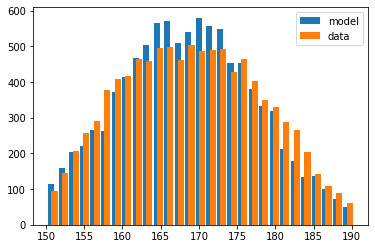

model [113.63118189 160.3011316  202.91282481 221.17497904 265.8158005
 261.75754401 373.35959765 413.94216262 468.72862531 503.22380553
 566.12678122 570.18503772 509.31119028 539.748114   580.33067896
 555.98113998 549.89375524 454.52472758 454.52472758 381.47611065
 332.77703269 318.57313495 211.0293378  178.56328583 133.92246438
 135.95159262 101.45641241  73.04861693  50.7282062 ]
[ 94 145 208 256 291 378 408 416 464 458 496 497 463 504 487 491 494 428
 466 404 349 330 288 265 204 141 109  89  60]
9683.000000000002
9683
168.573601777246
9.772232778476141


In [40]:
plt.bar(H_binning[:-1] + 0.5*(H_binning[1]-H_binning[0]),MC_H_hist[0]*MC_weight,label='model')
plt.bar(H_binning[:-1] + 0.8*(H_binning[1]-H_binning[0]),data_H_hist[0],label='data')
plt.legend()
plt.show()
print("model", MC_H_hist[0]*MC_weight)
print(data_H_hist[0])

print(np.sum(MC_H_hist[0]*MC_weight))
print(np.sum(data_H_hist[0]))

print(np.mean(data["Height"]))
print(np.var(data["Height"])**(0.5))

In [41]:
print(((data_H_hist[0]-MC_H_hist[0]*MC_weight)**2))
print(abs(data_H_hist[0]))

[3.85383303e+02 2.34124628e+02 2.58793514e+01 1.21278208e+03
 6.34243904e+02 1.35123086e+04 1.19995747e+03 4.23469470e+00
 2.23598974e+01 2.04519259e+03 4.91776544e+03 5.35604975e+03
 2.14472634e+03 1.27792765e+03 8.71061564e+03 4.22254855e+03
 3.12411187e+03 7.03561173e+02 1.31681877e+02 5.07325592e+02
 2.63184668e+02 1.30573245e+02 5.92448284e+03 7.47130556e+03
 4.91086100e+03 2.54864170e+01 5.69057138e+01 2.54446622e+02
 8.59661602e+01]
[ 94 145 208 256 291 378 408 416 464 458 496 497 463 504 487 491 494 428
 466 404 349 330 288 265 204 141 109  89  60]


In [42]:
print(minus2LogL(data=data_H_hist[0],model=MC_H_hist[0]*MC_weight))

198.80141200376744


In [43]:
def sample_1D_hist (hist, bins, size = 500) :
    bin_midpoints = bins[:-1] + np.diff(bins)/2
    cdf = np.cumsum(hist)
    cdf = cdf / cdf[-1]
    values = np.random.rand(size)
    value_bins = np.searchsorted(cdf, values)
    random_from_cdf = bin_midpoints[value_bins]
    return np.histogram(random_from_cdf,len(bins)-1)

In [44]:
def minus2LogL (data,model) :
    return np.divide((data-model)**2,abs(data),where=data!=0).sum()
    

chi2 value : 23.20931950178894


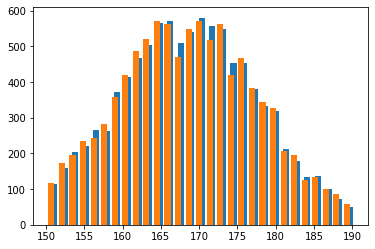

In [45]:
plt.bar(H_binning[:-1] + 0.75*(H_binning[1]-H_binning[0]),MC_H_hist[0]*MC_weight)
N_toys = 10000
toy_weight = data_lumi / N_toys
toy_H_hist = sample_1D_hist(MC_H_hist[0],H_binning,size=N_toys)
plt.bar(H_binning[:-1] + 0.5*(H_binning[1]-H_binning[0]),toy_H_hist[0]*toy_weight)
chi_2 = minus2LogL(data=toy_H_hist[0]*toy_weight,
                  model=MC_H_hist[0]*MC_weight)
print("chi2 value : {}".format( chi_2) ) 

In [46]:
test_stat_H = []
test_stat_W = []

N_toys = 100000 # sampling is cheep
toy_weight = data_lumi / N_toys
N_toy_experiment = 500

# print(MC_H_hist[0]*MC_weight)
# print("-"*70)
for i in range(N_toy_experiment) :
    toy_H_hist = sample_1D_hist(MC_H_hist[0]*MC_weight,H_binning,size=N_toys)
    toy_W_hist = sample_1D_hist(MC_W_hist[0]*MC_weight,W_binning,size=N_toys)
    test_stat_H.append(  minus2LogL(  data=toy_H_hist[0]*toy_weight,
                                      model=MC_H_hist[0]*MC_weight)
                           )

    test_stat_W.append(  minus2LogL(  data=toy_W_hist[0]*toy_weight,
                                     model=MC_W_hist[0]*MC_weight)
                     ) 

/home/janik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


model [113.63118189 160.3011316  202.91282481 221.17497904 265.8158005
 261.75754401 373.35959765 413.94216262 468.72862531 503.22380553
 566.12678122 570.18503772 509.31119028 539.748114   580.33067896
 555.98113998 549.89375524 454.52472758 454.52472758 381.47611065
 332.77703269 318.57313495 211.0293378  178.56328583 133.92246438
 135.95159262 101.45641241  73.04861693  50.7282062 ]
[ 94 145 208 256 291 378 408 416 464 458 496 497 463 504 487 491 494 428
 466 404 349 330 288 265 204 141 109  89  60]
198.80141200376744


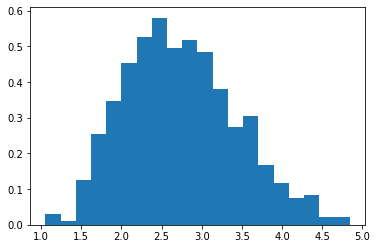

In [47]:
plt.hist(test_stat_H,20,normed=True)#,np.linspace(0,80,50),normed=True)
print("model",MC_H_hist[0]*MC_weight)
print(data_H_hist[0])
print(minus2LogL(data=data_H_hist[0],model=MC_H_hist[0]*MC_weight))
#plt.vlines(minus2LogL(data=data_H_hist[0],model=MC_H_hist[0]*MC_weight),0,0.08)